Cenário: mortalidade por mês em 2024 

In [1]:
import locale
import matplotlib.pyplot as plt
import pandas as pd

locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252')

df = pd.read_csv('cenario-mortalidade-ceara_2024-09-03_19-25-49.csv', encoding='ISO-8859-1', sep=';')

print(df.dtypes)

meses_pt = {
    'January': 'Janeiro', 'February': 'Fevereiro', 'March': 'Março', 
    'April': 'Abril', 'May': 'Maio', 'June': 'Junho', 
    'July': 'Julho', 'August': 'Agosto', 'September': 'Setembro', 
    'October': 'Outubro', 'November': 'Novembro', 'December': 'Dezembro'
}

df_grouped = df.groupby(['ACIDENTES', 'ESCOLARIDADE']).size().unstack()
df_grouped2 = df.groupby(['ACIDENTES', 'SEXO']).size().unstack()
df_grouped3 = df.groupby(['RACA', 'ACIDENTES']).size().unstack()
df_grouped4 = df.groupby(['FAIXA_ETÁRIA', 'ACIDENTES']).size().unstack()
df_grouped5 = df.groupby(['NOME_REGIAO', 'ACIDENTES']).size().unstack()

# Função para adicionar valores numéricos nas barras
def add_values(ax):
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=10)



DATA_ÓBITO           object
NOME_REGIAO          object
NOME_REGIAO_SAUDE    object
MUNICIPIO            object
FAIXA_ETÁRIA         object
ESCOLARIDADE         object
SEXO                 object
RACA                 object
CID                  object
ACIDENTES            object
QUANTIDADE            int64
dtype: object


Grafico 1: escolaridade x sexo

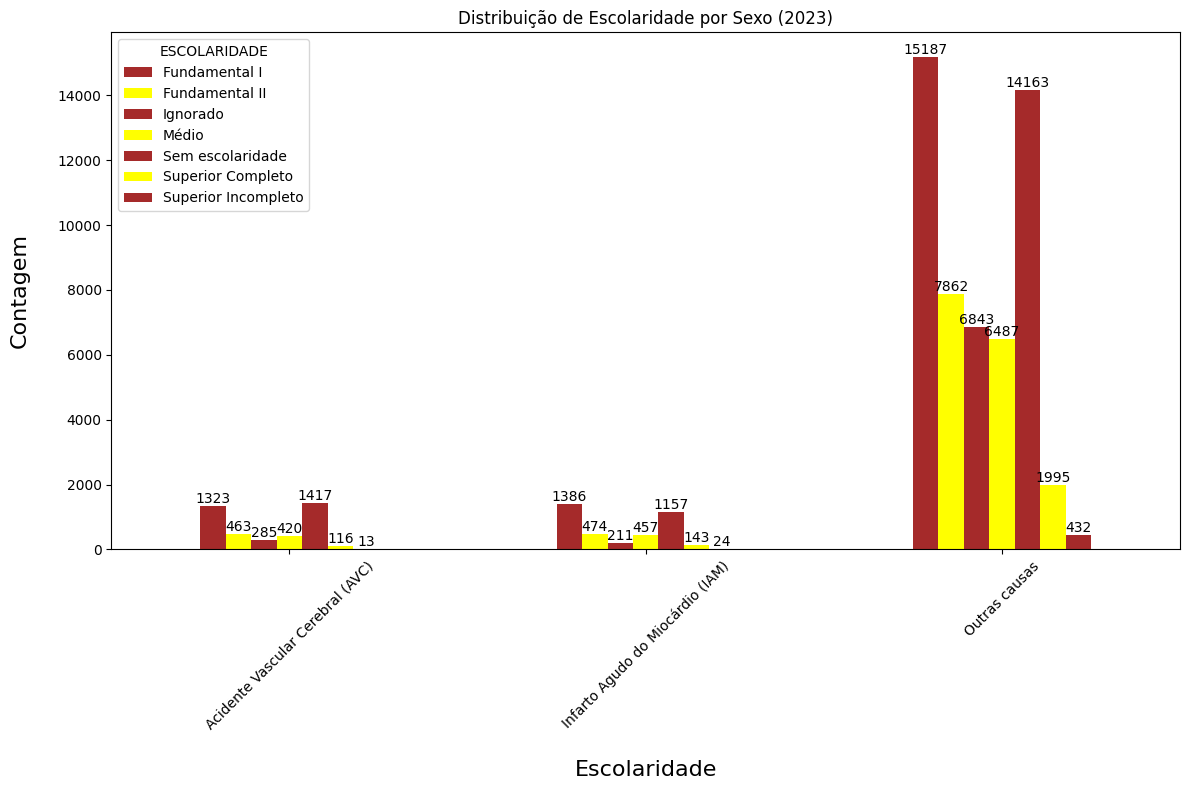

In [2]:
ax1 = df_grouped.plot(kind='bar', figsize=(12, 8), color=['brown', 'yellow'], stacked=False)
ax1.set_title('Distribuição de Escolaridade por Sexo (2023)')
ax1.set_xlabel('Escolaridade', fontsize=16, labelpad=20)
ax1.set_ylabel('Contagem', fontsize=16, labelpad=20)
plt.xticks(rotation=45)
plt.tight_layout()
add_values(ax1)  

Grafico 2: Tipos de acidente x sexo

In [ ]:
ax2 = df_grouped2.plot(kind='bar', figsize=(12, 6), color=['red', 'lightblue'], stacked=False)
ax2.set_title('Distribuição de Acidentes por Sexo (2023)')
ax2.set_xlabel('Número de Acidentes', fontsize=16, labelpad=20)
ax2.set_ylabel('Contagem', fontsize=16, labelpad=20)
plt.xticks(rotation=0)
plt.tight_layout()
add_values(ax2)

Grafico 3:  Raça x número de acidentes 

In [ ]:
ax3 = df_grouped3.plot(kind='bar', figsize=(12, 8), color=['green', 'grey', 'red'], stacked=False)
ax3.set_title('Distribuição de Raça por Número de Acidentes (2023)')
ax3.set_xlabel('Raça', fontsize=16, labelpad=20)
ax3.set_ylabel('Contagem',fontsize=16, labelpad=20)
plt.xticks(rotation=45)
plt.tight_layout()
add_values(ax3)  

Gráfico 4: Faixa etaria x acidente por AVC

In [ ]:
def autopct_format(pct):
    return ('%1.0f%%' % pct) if pct > 1 else ''

for column in df_grouped4.columns:
    plt.clf()

    sizes = df_grouped4[column].dropna().astype(float)

    if sizes.empty:
        print(f"Sem dados para {column}, pulando...")
        continue

    plt.figure(figsize=(10, 6))

    plt.pie(
        sizes, 
        autopct=autopct_format,
        startangle=90, 
        colors=['cyan', 'brown', 'yellow', 'green', 'grey', 'blue', 'red', 'purple', 'lime', 'orange'],
        labels=None,
        pctdistance=0.85
    )

    plt.title(f'Distribuição de {column} por Faixa Etária', fontsize=20)
    plt.ylabel('')

    plt.legend(
        labels=sizes.index,
        loc='upper left', 
        bbox_to_anchor=(1, 0.9), 
        fontsize=14,
        title='Faixa Etária'
    )

    plt.subplots_adjust(left=0.1, right=0.75, top=0.9, bottom=0.1)

    plt.show()

Gráfico 5: Número de acidentes x Região

In [ ]:
ax5 = df_grouped5.plot(kind='bar', figsize=(12, 8), color=['purple', 'limegreen', 'pink'], stacked=False)
ax5.set_title('Distribuição de Acidentes por Região (2024)')
ax5.set_xlabel('Região', fontsize=18, labelpad=20)
ax5.set_ylabel('Contagem', fontsize=18, labelpad=20)
plt.xticks(rotation=45)
plt.tight_layout()
add_values(ax5)  

Gráfico 6: Número de óbitos por mês 

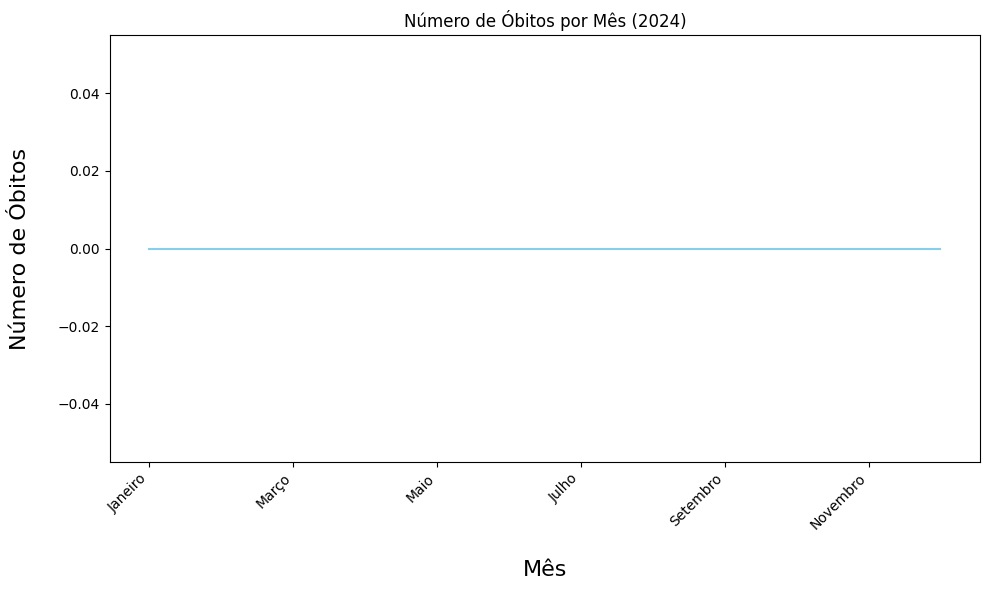

In [6]:
df['DATA_ÓBITO'] = pd.to_datetime(df['DATA_ÓBITO'], format='%Y-%m-%d', errors='coerce')
df = df.dropna(subset=['DATA_ÓBITO'])
df['MÊS'] = df['DATA_ÓBITO'].dt.strftime('%B')
df_grouped = df.groupby('MÊS').size()
df_grouped = df_grouped.reindex(pd.to_datetime(df_grouped.index, format='%B').sort_values().strftime('%B'))

plt.figure(figsize=(10,6))
df_grouped.plot(kind='line', color='skyblue')
plt.title('Número de Óbitos por Mês (2024)')
plt.xlabel('Mês', fontsize=16, labelpad=20)
plt.ylabel('Número de Óbitos', fontsize=16, labelpad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()